In [2]:
import numpy as np 
import pandas as pd 
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
data = pd.read_csv("nyc-rolling-sales.csv")
list(data.columns)
data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,12/14/16 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,12/9/16 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,11/28/16 0:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,4/21/17 0:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,7/5/17 0:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,12/21/16 0:00


In [44]:
# Changing any unknown sale prices to 0 and making them all ints
# 

for i in range(84548):
    if not isinstance(data['SALE PRICE'][i],int):
        if data['SALE PRICE'][i].isnumeric():
            data['SALE PRICE'][i] = int(data['SALE PRICE'][i])
        else:
            print(data['SALE PRICE'][i])
    if data['SALE PRICE'][i] == ' -  ':
        data['SALE PRICE'][i] = 0
  
    
'''
 For some reason, some values are stored as numpy int64, others are str's.
 I'm just going to iterate through SALE PRICE to fix this. Only doing once so there shouldn't
 be any time complexity issues
'''   
# data = data.replace(' -  ', 0)

data.head()

# temp = dict(data['SALE PRICE'].value_counts())


/Users/matthew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/matthew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  
 -  


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,7/19/17 0:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,0,12/14/16 0:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,0,12/9/16 0:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,9/23/16 0:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,11/17/16 0:00


In [45]:
list(data.columns)
num_only = data[['BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE','SALE PRICE']]

num_only

num_only.sort_values(by=['SALE PRICE'])


,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
63979,1472,20,11372,0,0,-,-,1921,2,0
39664,8955,67,11229,1,0,1501,1360,1955,1,0
39666,8955,160,11229,1,0,1785,1159,1925,1,0
17414,1243,1190,10025,1,0,-,-,1986,2,0
17413,1243,1187,10025,1,0,-,-,1986,2,0
...,...,...,...,...,...,...,...,...,...,...
2050,833,11,10001,0,55,30750,645977,1969,4,565000000
6332,934,1,10016,894,8,141836,829024,1975,2,620000000
2557,29,1,10004,0,1,42762,993569,1983,4,652000000
2559,40,3,10005,0,1,53632,1617206,1987,4,1040000000


In [46]:
num_only = num_only.replace(' -  ', 0)
for i in range(10000):
    num_only['SALE PRICE'] = num_only['SALE PRICE'].replace(i, 0)

    
num_only = num_only[num_only['SALE PRICE'] != 0]
    
#print(574+19052)

# num_only_no_price = num_only[:19626]
# num_only = num_only[19626:]

# # num_only_no_price = num_only[:24789]
# # num_only_odd_price = num_only[24789:25555]
# # num_only = num_only[25555:]

# # num_only
# # for i in range(10):
# #     num_only_odd_price['SALE PRICE'] = num_only_odd_price['SALE PRICE'].replace(i,0)
# #num_only_odd_price

In [47]:
# Looking at with excel
num_only.to_csv("num_only.csv")


In [2]:
# All zip codes correspond to a borough in nyc, 
# with a handful corresponding to Garden City for some reason
# However, some of the data is being stored as a string, while
# most of it is stored as a numpy i64...

num_only2 = pd.read_csv('num_only.csv', dtype=np.int64)
num_only2

NameError: name 'pd' is not defined

In [54]:
# There's a lot of data points without zipcodes, units, sq ft, etc.
# So, I'm going to throw this data out

num_only2 = num_only2[num_only2['ZIP CODE'] != 0]
# Dropping if only both columns are 0 (i.e., 0 residential and 0 commercial)
num_only2 = num_only2[num_only2['RESIDENTIAL UNITS'] + num_only2['COMMERCIAL UNITS'] != 0]
num_only2 = num_only2[num_only2['GROSS SQUARE FEET'] + num_only2['LAND SQUARE FEET'] != 0]

# checking this out in excel now...
num_only2.to_csv("num_only_nonzero.csv")

In [3]:
num_only2 = pd.read_csv('num_only_nonzero.csv', dtype=np.int64)

In [4]:
price = num_only2['SALE PRICE']
#units = num_only2[(num_only2['RESIDENTIAL UNITS'] + num_only2['COMMERCIAL UNITS'])]
sqft = num_only2['GROSS SQUARE FEET']



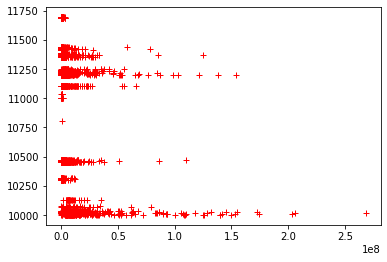

In [22]:
import matplotlib.pyplot as plt

#plt.plot(price, sqft, 'r+')

num_only3 = num_only2[num_only2['GROSS SQUARE FEET'] < 300000]
price = num_only3['SALE PRICE']
sqft = num_only3[['GROSS SQUARE FEET','LAND SQUARE FEET']]
zipcode = num_only3['ZIP CODE']


plt.plot(price, zipcode, 'r+')
plt.show()

In [19]:
from sklearn import linear_model
reg = linear_model.Lasso()

x_train, x_test, y_train, y_test = train_test_split(sqft, price, test_size = .2)

reg.fit(x_train, y_train)
rsq = reg.score(x_test, y_test)
print("Accuracy:", rsq)

Accuracy: 0.29195122716370603


In [ ]:
from sklearn import svm, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler

clf = svm.LinearSVC(max_iter = 10000)

x = num_only3[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE']]
y = num_only3['ZIP CODE']

x2_train, x2_test, y2_train, y2_test = train_test_split(x, y, test_size = .2)

clf.fit(x2_train, y2_train)
acc = clf.score(x2_test, y2_test)
print("Accuracy:", acc)

In [31]:
X = num_only2[['BLOCK','LOT','ZIP CODE','RESIDENTIAL UNITS','COMMERCIAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','YEAR BUILT','TAX CLASS AT TIME OF SALE']]
y = num_only2['SALE PRICE']

X.head()
y.head()


0     6625000
1     3936272
2     8000000
3     3192840
4    16232000
Name: SALE PRICE, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [33]:
clf = VotingClassifier([('lsvc', svm.LinearSVC()), ('knn',neighbors.KNeighborsClassifier()),('rfor',RandomForestClassifier())])
clf2 = RandomForestClassifier()

In [ ]:
#clf2.fit(X_train, y_train)
#confidence = clf2.score(X_test,y_test)
#print("Accuracy:", confidence)